# 基差-库存-利润分析

## 数据更新和加载

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pygwalker as pyg
import akshare as ak

warnings.filterwarnings('ignore')
MAC_OS = False
if MAC_OS:
    plt.rcParams['font.family'] = ['Arial Unicode MS']
else:
      rc = {'font.sans-serif': 'SimHei', 'axes.unicode_minus': False}
      sns.set(context='notebook', style='ticks', rc=rc)

In [4]:
# 加载合约基础数据
futures_comm_info = pd.read_excel('data/common_info.xlsx')

## 基差分析

### 基差走势

In [1]:
df_rb_basis = pd.read_csv('data/rb-main-basis-20231028.csv')
df_rb_basis['基差'] = df_rb_basis['现货'] - df_rb_basis['期货']
df_rb_basis.head()


,日期,期货,现货,基差率,基差
0,2020-10-28,3668,3700.0,0.86,32.0
1,2020-10-29,3668,3700.0,0.86,32.0
2,2020-10-30,3702,3747.0,1.20,45.0
3,2020-11-02,3719,3784.0,1.72,65.0
4,2020-11-03,3708,3784.0,2.01,76.0


In [ ]:
# 使用PygWalker进行可视化分析
pyg.walk(df_rb_basis, spec='./data/basis.jason')

<Axes: xlabel='日期', ylabel='基差'>

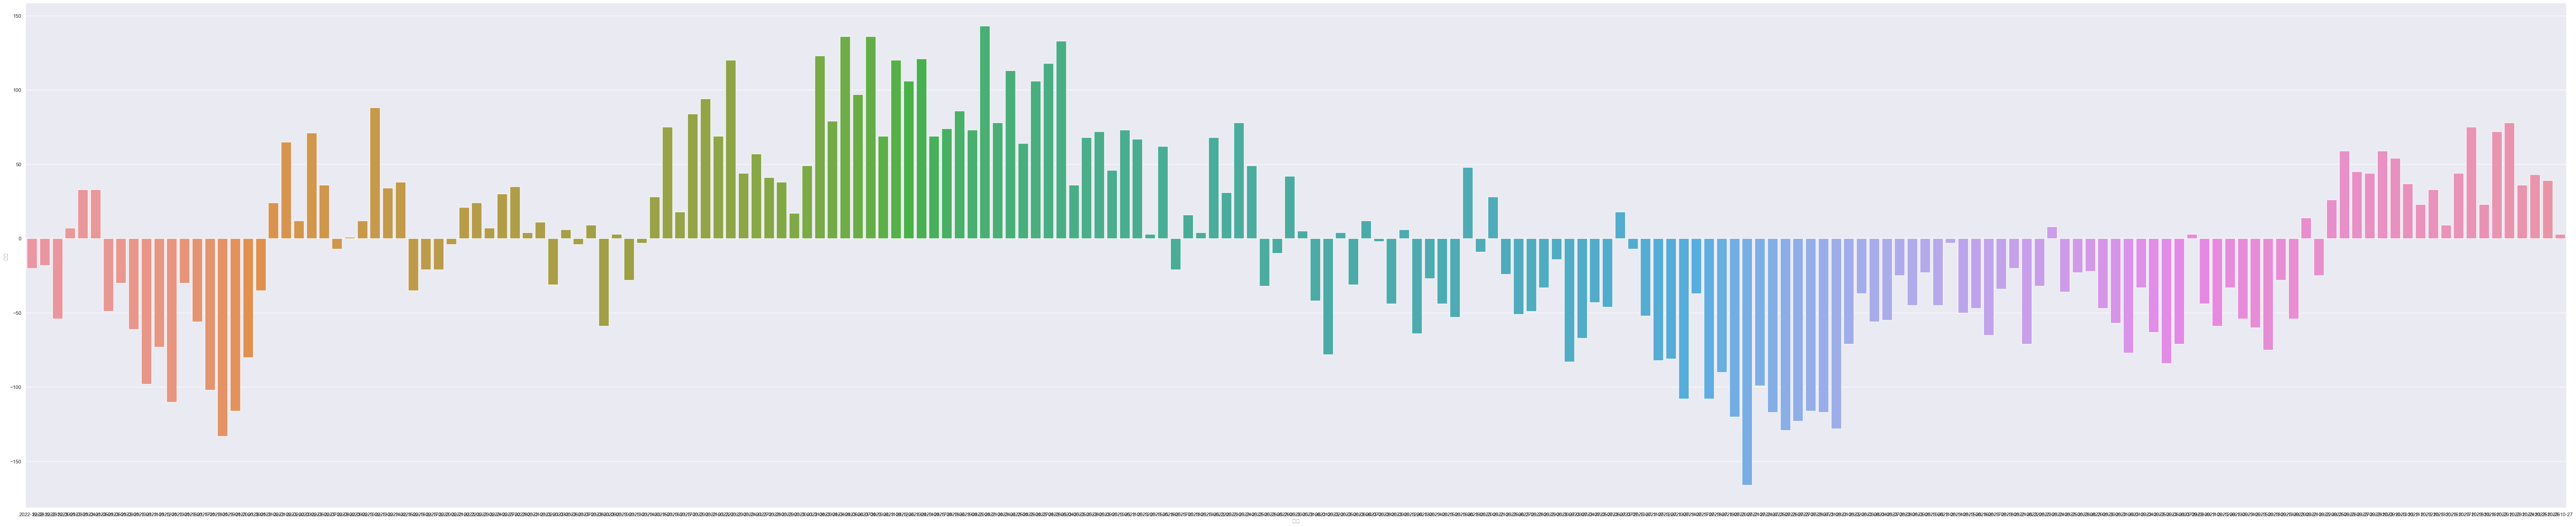

In [3]:
sns.set(rc={"figure.figsize": (100, 20)})
sns.barplot(data=df_rb_basis[-200:], x='日期',y='基差')

<Axes: xlabel='日期', ylabel='期货'>

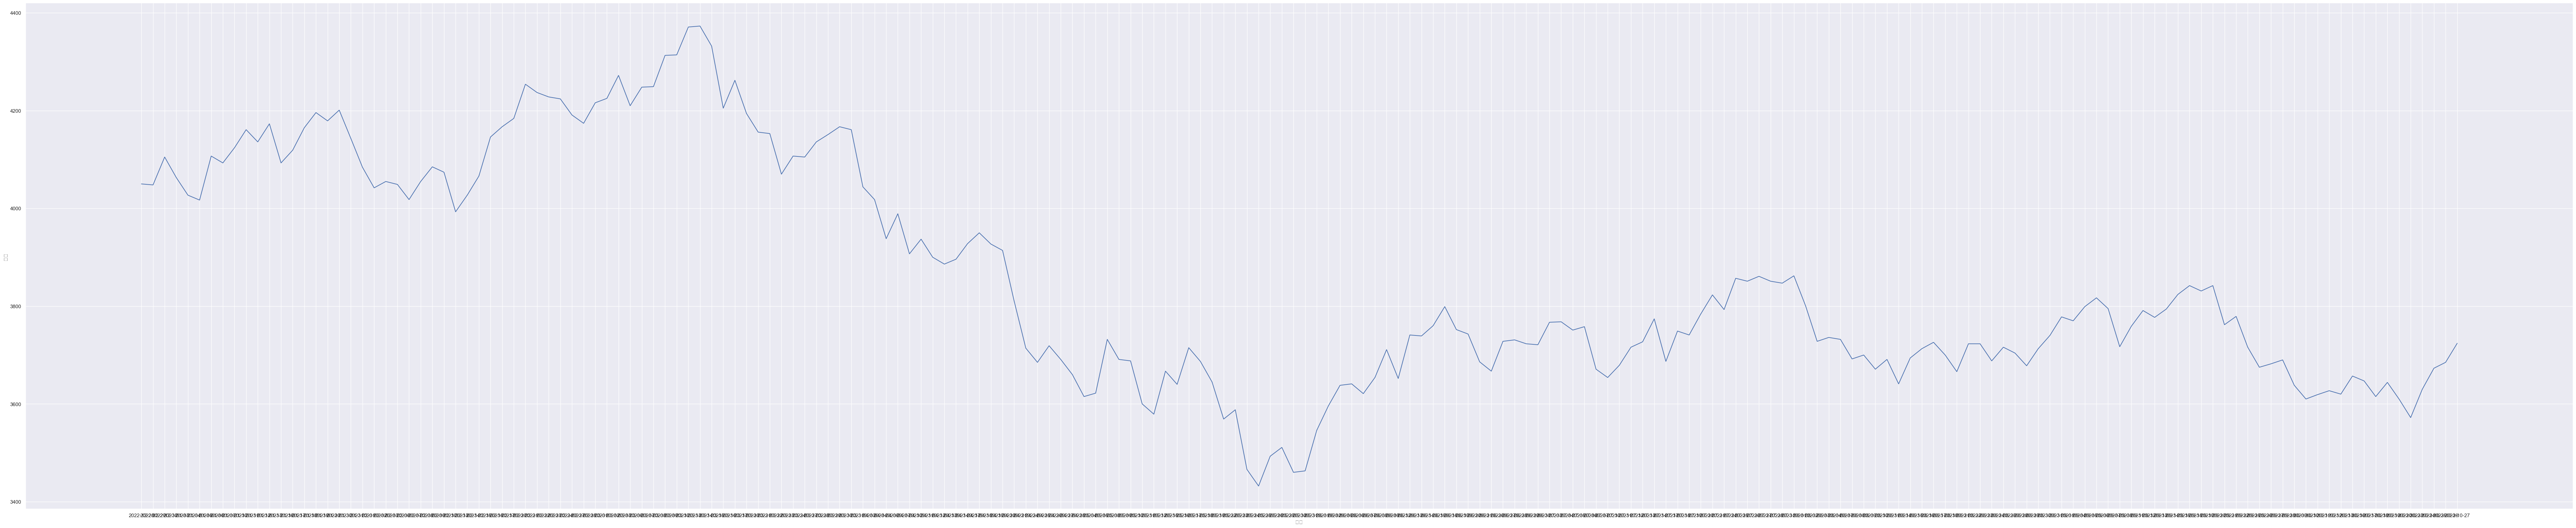

In [5]:
sns.lineplot(data=df_rb_basis[-200:], x='日期',y='期货')

In [8]:
futures_main_sina_hist = ak.futures_main_sina(symbol="RB0", start_date="20230101", end_date="20231027")
futures_zh_spot_df = ak.futures_zh_spot(symbol='RB2401', market="CF", adjust='0')
futures_zh_spot_df

,symbol,time,open,high,low,current_price,bid_price,ask_price,buy_vol,sell_vol,hold,volume,avg_price,last_close,last_settle_price
0,螺纹钢2401,150000,3745.0,3748.0,3712.0,3733.0,3733.0,3734.0,5,313,1692498.0,1069766,3729.0,3733.0,3725.0


### 基差率

In [ ]:
# 从akshare获取基差数据
# 基差数据截止到2023.9.14 ？

# stock_zh_a_minute_df = ak.stock_zh_a_minute(symbol='sz000876', period='1', adjust="qfq")
df1 = ak.futures_spot_price_daily(start_day='20230101',end_day='20230914', vars_list=['RB'])
df2 = ak.futures_spot_price_daily(start_day='20230916',end_day='20231020', vars_list=['RB'])

### 期限结构

<Axes: xlabel='合约代码', ylabel='现价'>

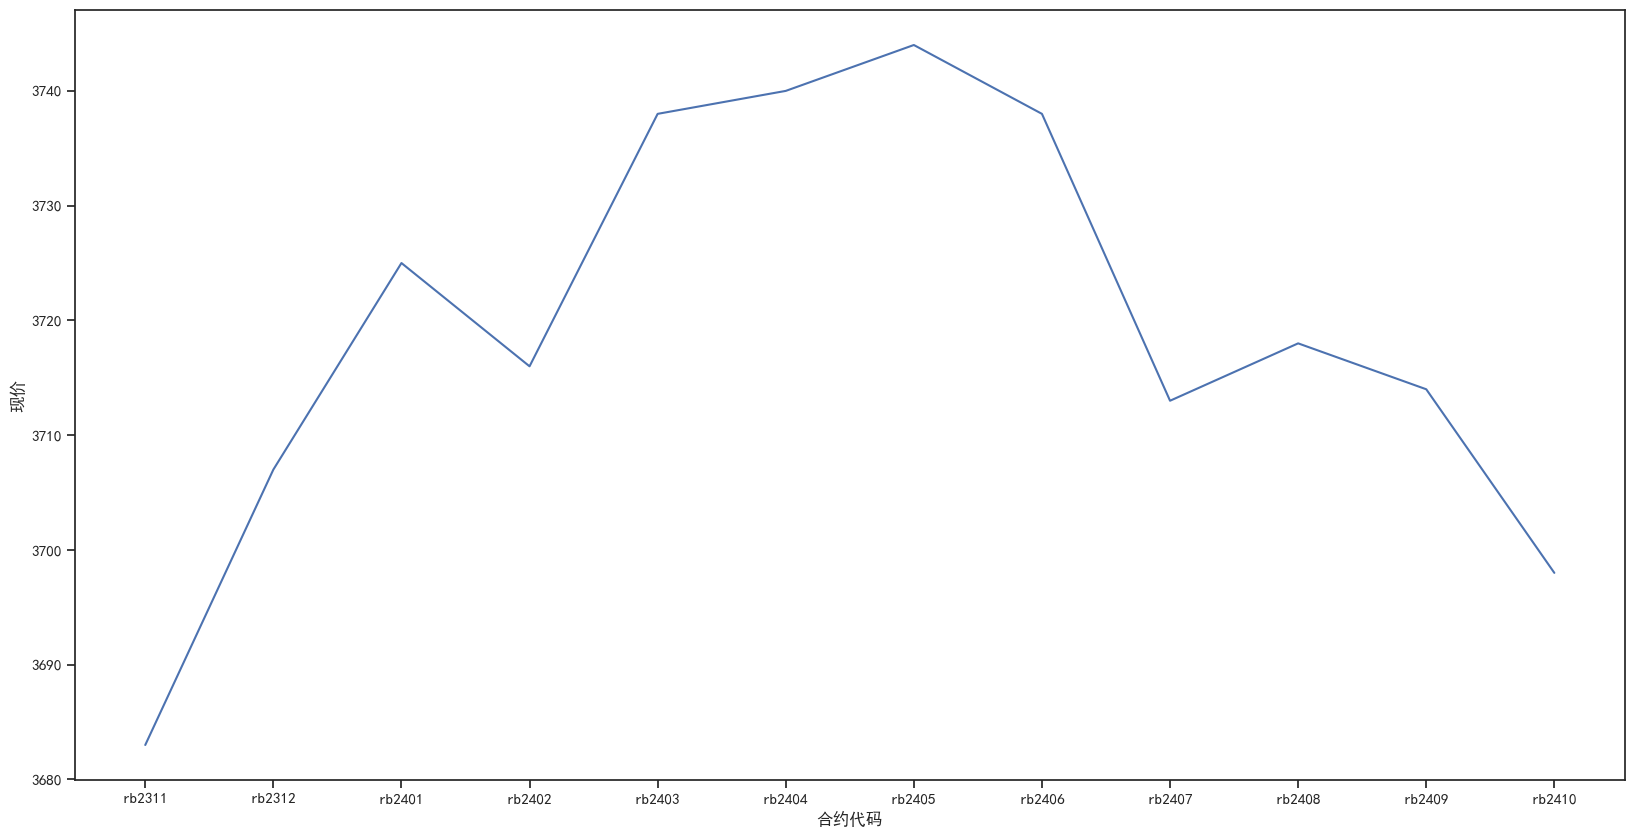

In [29]:
# 查询制定品种的所有近期和远期合约的上一交易日收盘价和现货价格，画出折线
#sns.set(rc={"figure.figsize": (20, 10)})
spec_contact_list = futures_comm_info[futures_comm_info.合约名称.str.startswith('螺纹钢')]
sns.lineplot(data=spec_contact_list, x='合约代码', y='现价')

## 库存

### 库存数据

In [14]:
futures_inventory_em_df = ak.futures_inventory_em(symbol="螺纹钢")
futures_inventory_em_df

,日期,库存,增减
0,2023-07-24,51016,NaN
1,2023-07-25,51016,0.0
2,2023-07-26,51016,0.0
3,2023-07-27,51016,0.0
4,2023-07-28,51016,0.0
...,...,...,...
61,2023-10-25,66299,-300.0
62,2023-10-26,65098,-1201.0
63,2023-10-27,65098,0.0
64,2023-10-30,60556,-4542.0


### 库存周期

### 仓单

#### 注册仓单

In [15]:
future_receipt = ak.get_receipt(start_day="20230101", end_day="20231031", vars_list=["RB"])
future_receipt

2020-01-02
20081006 起，上海期货交易所每个交易日更新仓单数据
2020-01-03
20081006 起，上海期货交易所每个交易日更新仓单数据
2020-01-06
20081006 起，上海期货交易所每个交易日更新仓单数据
2020-01-07
20081006 起，上海期货交易所每个交易日更新仓单数据
2020-01-08
20081006 起，上海期货交易所每个交易日更新仓单数据
2020-01-09
20081006 起，上海期货交易所每个交易日更新仓单数据
2020-01-10
20081006 起，上海期货交易所每个交易日更新仓单数据
2020-01-13
20081006 起，上海期货交易所每个交易日更新仓单数据
2020-01-14
20081006 起，上海期货交易所每个交易日更新仓单数据
2020-01-15
20081006 起，上海期货交易所每个交易日更新仓单数据
2020-01-16
20081006 起，上海期货交易所每个交易日更新仓单数据
2020-01-17
20081006 起，上海期货交易所每个交易日更新仓单数据
2020-01-20
20081006 起，上海期货交易所每个交易日更新仓单数据
2020-01-21
20081006 起，上海期货交易所每个交易日更新仓单数据
2020-01-22
20081006 起，上海期货交易所每个交易日更新仓单数据
2020-01-23
20081006 起，上海期货交易所每个交易日更新仓单数据
2020-02-03
20081006 起，上海期货交易所每个交易日更新仓单数据
2020-02-04
20081006 起，上海期货交易所每个交易日更新仓单数据
2020-02-05
20081006 起，上海期货交易所每个交易日更新仓单数据
2020-02-06
20081006 起，上海期货交易所每个交易日更新仓单数据
2020-02-07
20081006 起，上海期货交易所每个交易日更新仓单数据
2020-02-10
20081006 起，上海期货交易所每个交易日更新仓单数据
2020-02-11
20081006 起，上海期货交易所每个交易日更新仓单数据
2020-02-12
20081006 起，上海期货交易所每个交易日更新仓单数据
2020-02-13
20081

#### 仓单日报

#### 期转现

#### 交割统计

## 利润

## 综合分析